In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic =pd.read_csv('Titanic-Dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Replace 1 with 'Yes' and 0 with 'No'
titanic['Survived'] = titanic['Survived'].replace({1: 'Yes', 0: 'No'})

## Define the mapping for passenger classes
class_mapping = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}

### Apply the mapping to the Pclass column
titanic['Pclass'] = titanic['Pclass'].map(class_mapping)


## Replace the values in the 'Pclass' column using the mapping
titanic['Pclass'] = titanic['Pclass'].replace(class_mapping)



In [ ]:
titanic.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Lower Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,Lower Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,Lower Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [ ]:
subset=titanic[['PassengerId', 'Survived', 'Pclass', 'Parch' ]]
subset.head()

,PassengerId,Survived,Pclass,Parch
0,1,No,Lower Class,0
1,2,Yes,Upper Class,0
2,3,Yes,Lower Class,0
3,4,Yes,Upper Class,0
4,5,No,Lower Class,0


In [ ]:
# Total Number of Passengers

total_passengers=titanic.shape[0]
total_passengers

891

In [ ]:
titanic['Survived'].value_counts()

,count
Survived,
No,549
Yes,342


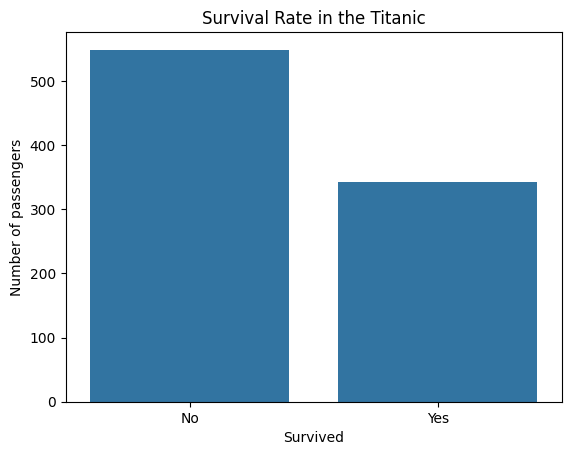

In [ ]:
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Rate in the Titanic')
plt.xlabel('Survived')
plt.ylabel('Number of passengers')
plt.show()

#Analysis
#those who did not survived are greater than those who survived.

In [ ]:
survival_counts = pd.crosstab(index=titanic['Sex'], columns=titanic['Survived'], margins=True, margins_name='Total')
survival_counts.columns = ['Did Not Survive', 'Survived', 'Total']
survival_counts

,Did Not Survive,Survived,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


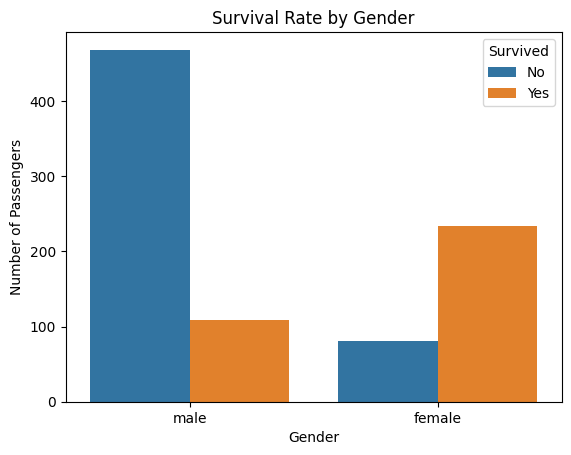

In [ ]:
# plotting survival rates by gender
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Survival Rate by Gender')
plt.show()

#Analysis:
#the survival rate of female is higher than that of the male.

In [ ]:
survival_counts = pd.crosstab(index=titanic['Pclass'], columns=titanic['Survived'], margins=True, margins_name='Total')
survival_counts.columns = ['Did Not Survive', 'Survived', 'Total']
survival_counts

,Did Not Survive,Survived,Total
Pclass,,,
Lower Class,372,119,491
Middle Class,97,87,184
Upper Class,80,136,216
Total,549,342,891


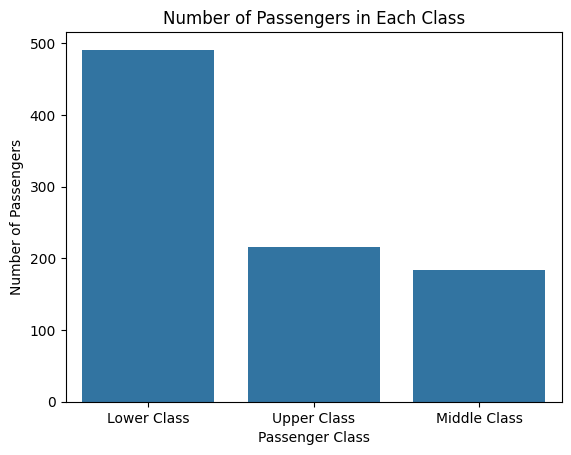

In [ ]:
sns.countplot(x='Pclass', data=titanic)
plt.title( 'Number of Passengers in Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

#Analysis:
#the number of passengers in the lower class is greater than that of the middle and higher class.

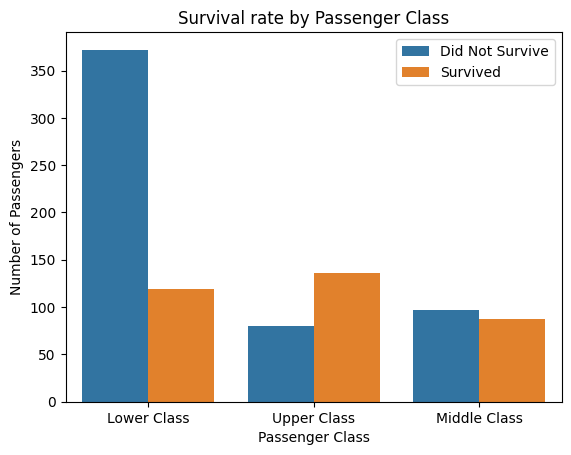

In [ ]:
#plotting survival rate by passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Survival rate by Passenger Class')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()



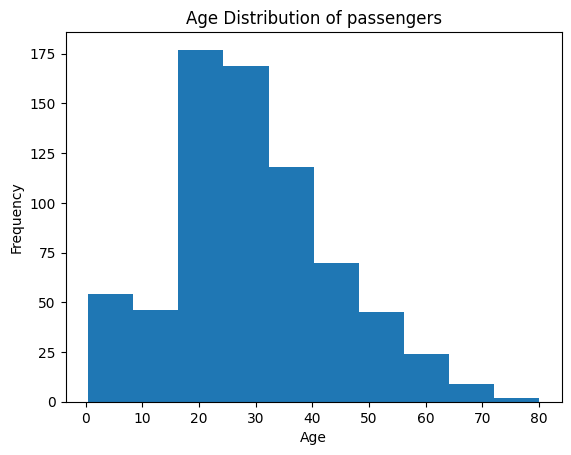

In [ ]:
titanic['Age'].plot.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of passengers')
plt.show()

#Analysis:
# we notice that highest age group travelling are among the young age between 15-35
#very few passengers in age group 70-80